# Visualizations for Tall Tails Project

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Classification Report

In [2]:
# Read in the Classification Report as a Dataframe
rf_classification_df = pd.read_csv('rf_model_classification_report.csv')

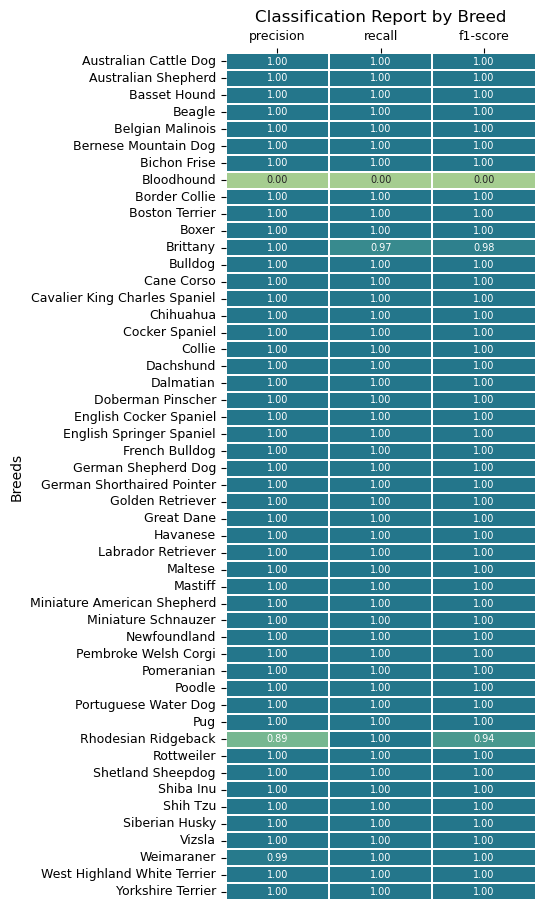

In [8]:
# Plot a heatmap of the Classification Table
import seaborn as sns
import matplotlib.pyplot as plt


# Set the 'Breeds' column as the index
c_report_heatmap_df = rf_classification_df.set_index('Breeds')

# Set the fontsize for rows values and y-labels
annot_kws = {"size": 7}
yticklabel_kws = {"size": 9}
xticklabel_kws = {"size": 9}

# Plot
plt.figure(figsize=(4, 11))
heatmap = sns.heatmap(c_report_heatmap_df, annot=True, cmap='crest', vmin=.85, vmax=1.1, fmt='.2f', linewidths=.05, annot_kws=annot_kws, cbar=False)

heatmap.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
# Display the column labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center', **xticklabel_kws)
# Change the fontsize for the y-labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right', **yticklabel_kws)

plt.title('Classification Report by Breed')

plt.savefig('../images/RandomForest_Model_Classification_Report', bbox_inches='tight')

plt.show()

### Summary Table

In [42]:
# Take the Model Summary and Create a Table Layout
summary_dict = {
    'Precision': [0.999492, 0.999492, 0.999492],
    'Recall': [0.977696, 0.979355, 0.978457],
    'f1_-Score': [0.999053, 0.999492, 0.999260]
}

classification_summary_df = pd.DataFrame(summary_dict)
classification_summary_df.index = ['Accuracy', 'Macro Average', 'Weighted Average']

display(classification_summary_df)

,Precision,Recall,f1_-Score
Accuracy,0.999492,0.977696,0.999053
Macro Average,0.999492,0.979355,0.999492
Weighted Average,0.999492,0.978457,0.999260


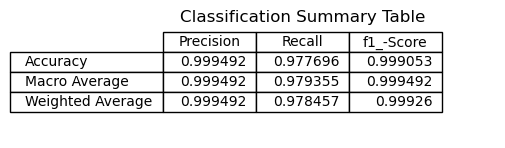

In [49]:
# Create a table plot
fig, ax = plt.subplots(figsize=(5, 1.4))
table = pd.plotting.table(ax, classification_summary_df, loc='upper center', colWidths=[0.2, 0.2, 0.2])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size

# Hide the axes
ax.axis('off')

plt.title('Classification Summary Table')

plt.savefig('../images/RandomForest_Model_Classification_Summary', bbox_inches='tight')

plt.show()

## Dog Bites

In [20]:
# Read in the New York City Dog Bite Data
dog_bites_df = pd.read_csv('DOHMH_Dog_Bite_Data_20240215.csv')

In [21]:
# Look at the Data
display(dog_bites_df.shape)
dog_bites_df.head()

(22663, 9)

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


In [75]:
# Number of Unique Breeds in the Dog Bite Data
dog_bites_df['Breed'].nunique()

1651

In [23]:
# Create a DataFrame of Dog Bites by Breed
dog_bites_breed_df = pd.DataFrame()

dog_bites_breed_df['Breed'] = dog_bites_df['Breed'].value_counts().head(50).index
dog_bites_breed_df['Count'] = dog_bites_df['Breed'].value_counts().head(50).values

dog_bites_breed_df.head(50)

,Breed,Count
0,Pit Bull,4004
1,UNKNOWN,2349
2,Shih Tzu,731
3,Chihuahua,646
4,German Shepherd,622
5,Mixed/Other,559
6,American Pit Bull Mix / Pit Bull Mix,520
7,American Pit Bull Terrier/Pit Bull,511
8,Yorkshire Terrier,480
9,MIXED BREED,388


In [25]:
# Read in the Licensing Data
dogs_licensed_df = pd.read_csv('NYC_Dog_Licensing_Dataset_20240214.csv', dtype=str)

In [30]:
dogs_licensed_df.head()

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035,09/12/2014,09/12/2017,2016
1,YOGI,M,2010,Boxer,10465,09/12/2014,10/02/2017,2016
2,ALI,M,2014,Basenji,10013,09/12/2014,09/12/2019,2016
3,QUEEN,F,2013,Akita Crossbreed,10013,09/12/2014,09/12/2017,2016
4,LOLA,F,2009,Maltese,10028,09/12/2014,10/09/2017,2016


In [32]:
# Create a DataFrame with Breeds and Breed Population that match the top bites by breed
dogs_licensed_t50bites_df = dogs_licensed_df.copy()

dogs_licensed_t50bites_df = dogs_licensed_t50bites_df['BreedName'][dogs_licensed_t50bites_df['BreedName'].isin(list(dog_bites_breed_df['Breed']))]
                                                               
t50bites_pop_df = pd.DataFrame() 

t50bites_pop_df['Breed'] = dogs_licensed_t50bites_df.value_counts().head(50).index
t50bites_pop_df['Population'] = dogs_licensed_t50bites_df.value_counts().head(50).values

t50bites_pop_df.head(3)

,Breed,Population
0,Yorkshire Terrier,35363
1,Shih Tzu,32432
2,Chihuahua,24634
3,Labrador Retriever,18902
4,Maltese,18377
5,Labrador Retriever Crossbreed,16532
6,American Pit Bull Mix / Pit Bull Mix,15073
7,Pomeranian,11953
8,American Pit Bull Terrier/Pit Bull,11596
9,Havanese,10658


In [33]:
# Merge the Bite and Population DataFrames
dog_bites_merged_df = dog_bites_breed_df.merge(t50bites_pop_df, how='left', left_on='Breed', right_on='Breed')

dog_bites_merged_df.head(50)

,Breed,Count,Population
0,Pit Bull,4004,13.0
1,UNKNOWN,2349,9.0
2,Shih Tzu,731,32432.0
3,Chihuahua,646,24634.0
4,German Shepherd,622,NaN
5,Mixed/Other,559,NaN
6,American Pit Bull Mix / Pit Bull Mix,520,15073.0
7,American Pit Bull Terrier/Pit Bull,511,11596.0
8,Yorkshire Terrier,480,35363.0
9,MIXED BREED,388,NaN


In [37]:
# Drop the NaN's, 'Unknown' and Terrier and any population less than 10
# Combine Pit Bulls, Poodles, Terrier
dog_bites_merged_clipped_df = dog_bites_merged_df.copy()

# drop NA's
dog_bites_merged_clipped_df.dropna(inplace=True)
# drop "Unknown" and "Mixed" rows
dog_bites_merged_clipped_df.drop(axis=0, index=[1, 11], inplace=True )
# Add up pop for Terrier, PitBull, German Shephard, and Poodles
# PitBull index => [0, 6, 7, 46], Terrier index => [8, 20, 24, 30, 40]
# Poodles => [15, 41, 48]
# dog_bites_merged_clipped_df


dog_bites_merged_clipped_df.head(50)


,Breed,Count,Population
0,Pit Bull,4004,13.0
2,Shih Tzu,731,32432.0
3,Chihuahua,646,24634.0
6,American Pit Bull Mix / Pit Bull Mix,520,15073.0
7,American Pit Bull Terrier/Pit Bull,511,11596.0
8,Yorkshire Terrier,480,35363.0
10,Maltese,371,18377.0
12,Rottweiler,316,2378.0
13,Siberian Husky,303,6387.0
14,Labrador Retriever,282,18902.0


In [59]:
dog_bites_merged_clipped_df['Count'].loc[[0, 6, 7, 46]]

0     4004
6      520
7      511
46      58
Name: Count, dtype: int64

In [71]:
# Combine Pit Bulls, Poodles, Terriers
# Add up pop for Terrier, PitBull, German Shephard, and Poodles
# PitBull index => [0, 6, 7, 46], Terrier index => [8, 20, 24, 30, 40]
# Poodles => [15, 41, 48]

# Counts
pitbull_bites = dog_bites_merged_clipped_df['Count'].loc[[0, 6, 7, 46]].sum()
terrier_bites = dog_bites_merged_clipped_df['Count'].loc[[8, 20, 24, 30, 40]].sum()
poodle_bites = dog_bites_merged_clipped_df['Count'].loc[[15, 41, 48]].sum()

# Population Count
pitbull_population = dog_bites_merged_clipped_df['Population'].loc[[0, 6, 7, 46]].sum()
terrier_population = dog_bites_merged_clipped_df['Population'].loc[[8, 20, 24, 30, 40]].sum()
poodle_population = dog_bites_merged_clipped_df['Population'].loc[[15, 41, 48]].sum()

# Create and append combined info to the DataFrame and Drop constituent data from DataFrame
ptp_addend_df = pd.DataFrame([['PitBulls', pitbull_bites, pitbull_population], 
                              ['Terriers', terrier_bites, terrier_population], 
                              ['Poodles', poodle_bites, poodle_population]], 
                            columns = ['Breed','Count','Population'])

# Drop consolidated columns
dog_bites_merged_consol_drop_df = dog_bites_merged_clipped_df.drop(axis=0, index=[0, 6, 7, 46, 8, 20, 24, 30, 40, 15, 41, 48])

top_dbites_consolidated_df = pd.concat([dog_bites_merged_consol_drop_df, ptp_addend_df])

top_dbites_consolidated_df

,Breed,Count,Population
2,Shih Tzu,731,32432.0
3,Chihuahua,646,24634.0
10,Maltese,371,18377.0
12,Rottweiler,316,2378.0
13,Siberian Husky,303,6387.0
14,Labrador Retriever,282,18902.0
18,Cocker Spaniel,172,6050.0
19,Labrador Retriever Crossbreed,160,16532.0
21,Beagle,142,8998.0
22,Golden Retriever,133,9253.0


In [74]:
# Add a calculated column that adjusts for Dog Population in Licensing Data
top_dbites_consolidated_df[['Count', 'Population']] = top_dbites_consolidated_df[['Count', 'Population']].astype(dtype=int)

top_dbites_consolidated_df['Bites(adjusted)'] = top_dbites_consolidated_df['Count']/top_dbites_consolidated_df['Population']

top_dbites_consolidated_df.sort_values(by=['Bites(adjusted)'])

,Breed,Count,Population,Bites(adjusted)
42,Havanese,63,10658,0.005911
31,Chihuahua Crossbreed,87,9633,0.009031
19,Labrador Retriever Crossbreed,160,16532,0.009678
25,Pomeranian,119,11953,0.009956
37,Australian Shepherd,67,5745,0.011662
33,German Shepherd Crossbreed,81,6372,0.012712
35,Bichon Frise,72,5020,0.014343
22,Golden Retriever,133,9253,0.014374
14,Labrador Retriever,282,18902,0.014919
21,Beagle,142,8998,0.015781


In [81]:
# copy the data 
df_max_scaled = top_dbites_consolidated_df.copy() 
  
# apply normalization techniques on Column 1 
column = 'Bites(adjusted)'
df_max_scaled['Bites(scaled)'] = df_max_scaled[column] /df_max_scaled[column].abs().max() 
  
# view normalized data 
top_dbites_final_df = df_max_scaled.sort_values(by=['Bites(scaled)'], ascending=False)

In [82]:
# Export as CSV
top_dbites_final_df.to_csv('top_dogbites_breeds.csv', index=False)

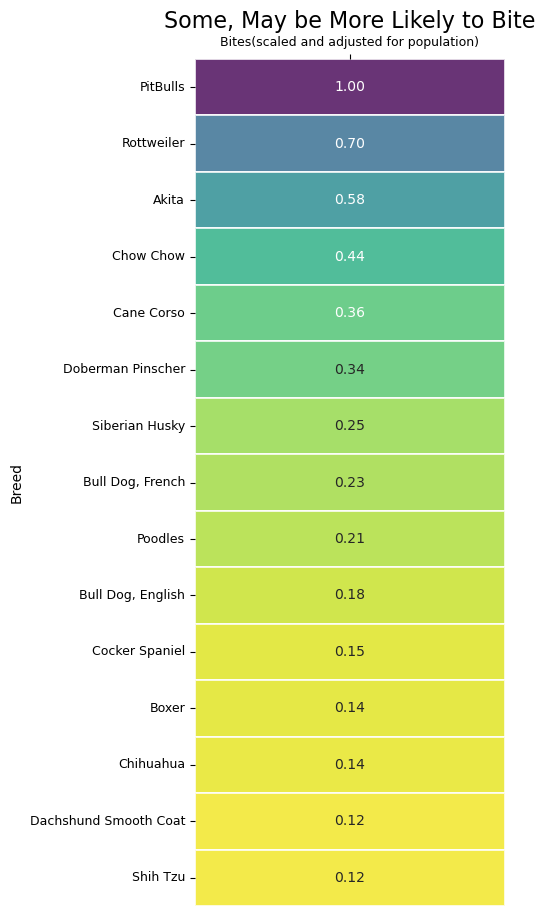

In [105]:
# Create a Heat Map for Bites
heat_bites_df1 = top_dbites_final_df[['Breed', 'Bites(scaled)']].head(15)
heat_bites_df1.columns = ['Breed', 'Bites(scaled and adjusted for population)']

# Set the 'Breeds' column as the index
bites_heatmap_df1 = heat_bites_df1.set_index('Breed')

# Set the fontsize for rows values and y-labels
annot_kws = {"size": 10}
yticklabel_kws = {"size": 9}
xticklabel_kws = {"size": 9}

# Plot
plt.figure(figsize=(4, 11))
heatmap = sns.heatmap(bites_heatmap_df1, annot=True, cmap='viridis_r', vmin=.10, vmax=1.0, fmt='.2f', linewidths=.05, annot_kws=annot_kws, cbar=False, alpha=.8)

heatmap.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
# Display the column labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center', **xticklabel_kws)
# Change the fontsize for the y-labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right', **yticklabel_kws)

plt.title('Some, May be More Likely to Bite', fontsize= 16)

plt.savefig('../images/some_bites_are_more_likely', bbox_inches='tight')

plt.show()

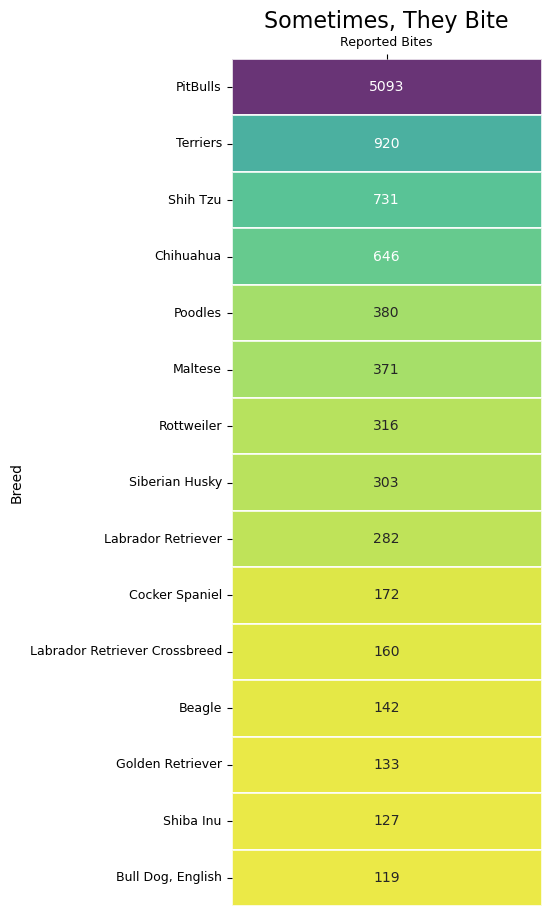

In [106]:
heat_bites_df2 = top_dbites_final_df[['Breed', 'Count']].sort_values(by='Count', ascending=False).head(15)
heat_bites_df2.columns = ['Breed', 'Reported Bites']

# Set the 'Breeds' column as the index
bites_heatmap_df2 = heat_bites_df2.set_index('Breed')

# Set the fontsize for rows values and y-labels
annot_kws = {"size": 10}
yticklabel_kws = {"size": 9}
xticklabel_kws = {"size": 9}

# Plot
plt.figure(figsize=(4, 11))
heatmap = sns.heatmap(bites_heatmap_df2, annot=True, cmap='viridis_r', vmin=50, vmax=2000, fmt='.0f', linewidths=.05, annot_kws=annot_kws, cbar=False, alpha=.8)

heatmap.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
# Display the column labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center', **xticklabel_kws)
# Change the fontsize for the y-labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right', **yticklabel_kws)

plt.title('Sometimes, They Bite', fontsize= 16)

plt.savefig('../images/sometimes_they_bite', bbox_inches='tight')

plt.show()